In [79]:
import requests, json
from collections import OrderedDict
from operator import getitem
import time
import datetime
import pandas as pd
import numpy as np
import warnings
import math
import re
from web3 import Web3
from ens import ENS
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objs as go
pyo.init_notebook_mode()
pd.options.plotting.backend = 'plotly'

# Get current holders of Tokens

In [4]:
#define token address
token_address = '0x57e114b691db790c35207b2e685d4a43181e6061' #ENA Token

In [1]:
AMBERDATA_API_KEY = 'AMBERDATA_API_KEY_HERE' 

In [6]:
headers = {
    "accept": "application/json",
    "x-amberdata-blockchain-id": "ethereum-mainnet",
    "x-api-key": f'{AMBERDATA_API_KEY}' ##ENTER YOUR API KEY
}

In [8]:
#Empyt dict for storing returned data and an ID. 
collection = {}
id = 0
#For Pagination
pagination = 0
total_pages_required = 40
token_decimal = 18

In [13]:
# Iterate over pages to get all holders to get the current balance of all Token Holders. 
while pagination <= total_pages_required:
    #Fetch Contract Events Logs. 
    url = f"https://api.amberdata.com/blockchains/tokens/{ena_token_address}/holders/latest?page={pagination}&size=1000"
    response = requests.request("GET", url, headers=headers)
    while response.status_code == 429:
        time.sleep(1)
        response = requests.request("GET", url, params=querystring)
    if response.status_code == 200:
        batch_list = json.loads(response.text)["payload"]['records']
        for item in batch_list:
            try: 
                id = id+1
                collection[id] = {}
                collection[id]["token_address"] = item['tokenAddress']
                collection[id]["holder_address"] = item['holderAddress']
                collection[id]['holder_first_timestamp'] =item['holderFirstTimestamp']
                collection[id]['balance_raw'] = item['numTokens']
                collection[id]['balance'] = float(item['numTokens']) / math.pow(10,token_decimal)
            except NameError:
                print(NameError)
        print('Finished page',pagination, total_pages_required, id)
        pagination += 1

Finished page 0 40 1000
Finished page 1 40 2000
Finished page 2 40 3000
Finished page 3 40 4000
Finished page 4 40 5000
Finished page 5 40 6000
Finished page 6 40 7000
Finished page 7 40 8000
Finished page 8 40 9000
Finished page 9 40 10000
Finished page 10 40 11000
Finished page 11 40 12000
Finished page 12 40 13000
Finished page 13 40 14000
Finished page 14 40 15000
Finished page 15 40 16000
Finished page 16 40 17000
Finished page 17 40 18000
Finished page 18 40 19000
Finished page 19 40 20000
Finished page 20 40 21000
Finished page 21 40 22000
Finished page 22 40 23000
Finished page 23 40 24000
Finished page 24 40 25000
Finished page 25 40 26000
Finished page 26 40 27000
Finished page 27 40 28000
Finished page 28 40 29000
Finished page 29 40 30000
Finished page 30 40 31000
Finished page 31 40 32000
Finished page 32 40 33000
Finished page 33 40 34000
Finished page 34 40 35000
Finished page 35 40 36000
Finished page 36 40 37000
Finished page 37 40 38000
Finished page 38 40 38615
Finis

In [14]:
df = pd.DataFrame.from_dict(collection,orient='index')

In [16]:
df["holder_first_timestamp"] = pd.to_datetime(df['holder_first_timestamp']).dt.date

In [20]:
df = df[df['balance']> 3000]  #Filtering for wallets that hold at least $1000 in ENA 

# 2. We fetch all the other token balances for the wallets that hold ENA. 

In [22]:
# API setup
base_url = "https://api.amberdata.com/blockchains/addresses/{}/balances"
token_data = []  # List to store each token's information as a dictionary
def fetch_token_data(holder):
    url = base_url.format(holder)
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        tokens = response.json()['payload']['tokens']
        for token in tokens:
            # Extract required information for each token and add to the list
            token_dict = {
                'holder': holder,
                'token_address': token['address'],
                'symbol': token['symbol'],
                'balance': token['amount'],
                'name': token['name'],
                'decimal': token['decimals']
            }
            token_data.append(token_dict)
    else:
        print(f"Failed to fetch data for holder {holder}: {response.text}")

In [23]:
# Iterate over the list of ENA holders and get all their other token balances. 
for holder in df['holder_address']:
    fetch_token_data(holder)

print(token_data)

fetching  0xd4b34207a671b813b5e66d31ea0b0a9849de9bc1  balances
fetching  0x688ae58ebd684b3c475c81584f976593930ca67f  balances
fetching  0xf977814e90da44bfa03b6295a0616a897441acec  balances
fetching  0x8707f238936c12c309bfc2b9959c35828acfc512  balances
fetching  0xf2dd80ecfab0515e6a8d561ff72a13c499d119cb  balances
fetching  0x66c68a7bcc4cbcab43a2947a529765d86d4ef14f  balances
fetching  0xe39b5f5638a209c1a6b6cdffe5d37f7ac99fcc84  balances
fetching  0xf89d7b9c864f589bbf53a82105107622b35eaa40  balances
fetching  0xfccdb42342c877d161197759642ffb5c0bcc80c8  balances
fetching  0xc882b111a75c0c657fc507c04fbfcd2cc984f071  balances
fetching  0x1c00881a4b935d58e769e7c85f5924b8175d1526  balances
fetching  0xed3d1bd77037469a504c8c3d8af45b37a5eaa68d  balances
fetching  0xd6216fc19db775df9774a6e33526131da7d19a2c  balances
fetching  0x4736808151268507a40eb6ac92d67345e8301a74  balances
fetching  0xae3106bce6d895badcd79eb38417b37ee4887b1b  balances
fetching  0xe062995ddec38745bc145e9cc2ff981f6bd08201  b

fetching  0x56a2b7581abb55b500732871b77f4198d5f9ae58  balances
fetching  0x89638209d697505f9b9f8a3971a7d0c8b093483d  balances
fetching  0x6aade417ac3795ee64fae612655b551760cf2512  balances
fetching  0x52d3374ed618300e1bac1c3379f8f1bf0c51516c  balances
fetching  0x374e77f489c0d868c6473217f8890b44e98c9a4a  balances
fetching  0x58edf78281334335effa23101bbe3371b6a36a51  balances
fetching  0x0a5dd6315f950994ff486603366dc5e49431dba3  balances
fetching  0x477979de7efcc6afbc080ae522edf7c591f441a1  balances
fetching  0xbe13b4b559e82cceeef4ae035485cd649b781b5c  balances
fetching  0xcb4f0ecd658ea35a8197f4a721df05935adc4133  balances
fetching  0xfc545f345e2afc52652cd6f76323c5ddc847bd6d  balances
fetching  0x42ae1d6a320e93f119d6f136912cfa12f0799b8a  balances
fetching  0xb60473e0b7db95556baea5d6047a9ade5c338b04  balances
fetching  0x63dfe4e34a3bfc00eb0220786238a7c6cef8ffc4  balances
fetching  0x76a74a1bc386a91e5c4e78f66ddfce660b2c0e6b  balances
fetching  0xff9ea9a5832f90be6dc9d280c892beb86f97d5ac  b

fetching  0x2d25810d14abb3f5624c9ed94d4c59e1b2846507  balances
fetching  0x9d5af80daf9be5742d2ee89bda4287fc22a3564c  balances
fetching  0xd6a61159004f5042a775df9b2eda1879685b3fde  balances
fetching  0x3c6c53556f126cb62206bcb4dd3f12ffde112614  balances
fetching  0x3dd92437deaf620da4705429c9331ac9d4d6a890  balances
fetching  0x2f602f7190ef2a195bc7ce4db1b27da55f918452  balances
fetching  0xad673dd5ec69c3a7ed68c09c39a9e6df88be371d  balances
fetching  0xa692b66234a6e8f43c5a33901dae781f2c887f61  balances
fetching  0x9a78943c6fa0cbab07d3a649b4921c10b3186e91  balances
fetching  0x53768fa60d46222300a6f990ea06029888b85827  balances
fetching  0x15d9f2dd2d3660e1d777db2e40ffd575a676ed07  balances
fetching  0x3a7f4fec6814bb2b1948ed7277c1ac5ed1d87c72  balances
fetching  0xbbf62549695911e4fbfb05bafc13114d03de2bdc  balances
fetching  0x4d123af246f59a51243b85fd682258f822c9fc30  balances
fetching  0x63f4cbbd88033c366507c3f6edf0ad64c32cb641  balances
fetching  0xba4a2dc065fc0ee11f5d1df7e8d8e0c929470689  b

fetching  0xdb7c8f44883ad071305e041bbf3f3676f9b6ca21  balances
fetching  0x3dff94cd02988330fba4952509860b3f7e336e08  balances
fetching  0x012feee1af011db48688a990fdeaa9d77090b420  balances
fetching  0xbf8f7a9effec3eba5660be4efd58a64ae76b1d8a  balances
fetching  0xc19e7f7a15323d725f04781d88183c69e28795d2  balances
fetching  0x1598bb1e55e22490e7771800c499037b15ae71e3  balances
fetching  0xee9549c78a5e075b9bf80dfa645de44d10608e20  balances
fetching  0xd76612e38560135a9e8c7ccf2f5e457b4fd9af8f  balances
fetching  0x8bd178eca251076757d96208866a85c4fd027c96  balances
fetching  0xa8c53245fcd55c453205c6f34601bc9526d18820  balances
fetching  0x58c43a3a44cef1b2b6ed613de1430ef89eaea7d7  balances
fetching  0x1692db564a7a1822a69a52e0068f12b9496bc853  balances
fetching  0xeee82a5e96336d75a7f98b61f34bc2745a0dcb9d  balances
fetching  0xba36aa5e3b42e313a85544ffc4d826d61c3b82b4  balances
fetching  0x8c4849661d1a88b3066bb141ccc9f0d2631b4d52  balances
fetching  0x4d0d8b7bfff73a01d6f6aeae16e2441948a921fc  b

fetching  0x91c6642bd1090f09395bc03029560d5d222b8616  balances
fetching  0xa152ba5c481be9a479179f12b4c300fad2a62917  balances
fetching  0xd712fb19bf6f3391e264cfcca10c3428bcf0231b  balances
fetching  0x0a2fd715306c7b5e0bce4d1408d258b7aa6271c2  balances
fetching  0xe26abc37b06b819243b4b104270cc18f7c835fce  balances
fetching  0x720684abc1637218c63d36e6b7f34703150e4b05  balances
fetching  0x26a13bfeed8126bb61f10fb58be2b1157540d680  balances
fetching  0xe94c876f00c728ea86c70799e5884f19d7766604  balances
fetching  0x41a70a042fc02461d700c3e53ac5526727ca8e6b  balances
fetching  0xed9fba3b870d8894d739edf2157c28ccc640e668  balances
fetching  0x5c22fa4089cfab73af86951e2ce324a51f3a8e4e  balances
fetching  0xfa88c88f68fc7a66ccd512a34f7686fded60caf4  balances
fetching  0xc80005ab8ea04ce48c535272a5f60476d3ba3475  balances
fetching  0xe2bb8c3ca4bbb8c6fb343abfd778ed09f49334ea  balances
fetching  0x1acc8c451c9bc99c317954f26e59432a8388b2dd  balances
fetching  0xc3ccaf9b9649b13a073d6bc3699d72666dad7342  b

fetching  0xad15fcd2e6d0947bcc0ae86bbfb45b575fef5485  balances
fetching  0x9f2b4f9211dea9f315d63526c09f5a29690b0bcd  balances
fetching  0xdec53aa5b5b6ec2518814061b1ec72f6a26bb5b8  balances
fetching  0xcb02fd2a2666a30f723d50a58e21423ad9d42e97  balances
fetching  0x94f5a35212df61da01ee7e53d622b6a913e70557  balances
fetching  0xb222ae2dc3fa62cfea005e5d56fa1c5abc894c4b  balances
fetching  0x2120d9da11802903d8724568a2f67b0d8d949f16  balances
fetching  0x7231175ef811bed3bfb459ebf95f0e3ad766b208  balances
fetching  0x223ae404d269d29d09230615856f731a9bb2bb74  balances
fetching  0x767c43db6300b00165f06bdc29fd215b60168af7  balances
fetching  0xc63e690f4e941e335f85ceab7ede0f6bf3fc7321  balances
fetching  0xd5750133af0d2dfd7cfca09d189e8d084010cad4  balances
fetching  0x9c51ff53e842eeec93f9d5efbf52f6a02591755c  balances
fetching  0x7b76035341a8e377727db95395bc2da2b66cdc7d  balances
fetching  0x0fe8c7ecc105a53a55113157022f74be5f4b1560  balances
fetching  0x37691e6d11b101528bce1b91aa4188bfe2befc03  b

fetching  0x3bc96fde5f86c2b41a260391c0d39b4491b9eae7  balances
fetching  0x8707c3b1a471a35e43eb91a2111f1ab793ac2e7e  balances
fetching  0x85ce4b1df5bf64945e3aa821d78d64d52caa70be  balances
fetching  0x7567c997f682933c27116373032a77203d2e5fec  balances
fetching  0xa4aa62ae00e397c8a66bb647506cadb4b32e6cf4  balances
fetching  0xda57cbabb20f5d0707cb3f946a4253a70b7441a0  balances
fetching  0xafa4491d7ba47dca122691b2e3dd639a80aca3e2  balances
fetching  0x32b8f328e91b257dedbe2af9fa5dda6826e3cc76  balances
fetching  0x82bd075e329ea9100da1108e7465a3092025f5d4  balances
fetching  0x6d56f592da67ace9ab98f79095d65a04678cc398  balances
fetching  0xf3ee25775ea68d50b9706868b59863d5aab1b2af  balances
fetching  0x2b334838596678e44d309285d3531a7ee7ee5e8e  balances
fetching  0x2d0471e3d976e5c4c88914e2f4c73809ab1588e0  balances
fetching  0x5682ff369a3ce80dd7ec2401b2f1e098fd09c954  balances
fetching  0x9d956f6f125f4758e1cc15423f9888842c032116  balances
fetching  0xe4ae97b3ef516a64d73b4c0ad6e8336c42e27eee  b

fetching  0x209d9dc796b0390971019677879b18ba6a8512f9  balances
fetching  0x76cea8d9d3817fe361e1c1d32081f7c1ddb6aaae  balances
fetching  0x7d2c8f85ed40d2335528015be30ee008718fc8dc  balances
fetching  0x8fce2f084eec619ada4f716f51242956bc7008b2  balances
fetching  0xa1e8a739166876845b7dedc177989024bab0d810  balances
fetching  0xc6011530ce42995634b53fb8af2fc685837439a6  balances
fetching  0x486cdbe454da8cbcf763f057f4b72104436f5d46  balances
fetching  0xf6a25027ef935a8a53b239d0b185482581cd57be  balances
fetching  0x05a7034af75e5ae0c59d979c401d756698d05809  balances
fetching  0xdf3b3ce9981f2e7aac3dc3fe399360cf1939dca9  balances
fetching  0x15b989222088b5a00d1283e8c2bbbe9cc7bd4b30  balances
fetching  0xe831be8b996d9ae8e4d36f78dc1ae35421fd78e8  balances
fetching  0x3e0770c75c0d5afb1cfa3506d4b0cab11770a27a  balances
fetching  0x5d918c3b03cde36c18c685bdabee34444e95af98  balances
fetching  0xb1bbd8297c433318bb3b184f1fda1cceeb1c5196  balances
fetching  0x89e02a303b326b4d4cb96793f381e57e059fe035  b

fetching  0x169399ce992c9c34da8ccd3c3bc55c2a109dab16  balances
fetching  0x12706fc27f5d92fcbc2ef92df5ba55e0986537fc  balances
fetching  0xa299842fd0c72ae699b08d0acce721bb738f1fc0  balances
fetching  0xf807967e9adc0400c2465f0cf7104494871fc653  balances
fetching  0x1ac08405e96e3561893eef86f194acdb9a24d38d  balances
fetching  0x700570ada3fefb97acb2388acaf425790b4f11a9  balances
fetching  0x9b476150c72733de0cdbf4d1a3846f9ae7bae130  balances
fetching  0x4d0bf3c6b181e719cdc50299303d65774dfb0af7  balances
fetching  0x1dd50940e8a52ae46d8d4953922ff204a3e8a698  balances
fetching  0x0164f3df431f4bc26466ee84710c04e37e6d2a56  balances
fetching  0xc46bfd225ad359f78c7fe84d50619977c6b7f318  balances
fetching  0x213996f4d1a2c05dfe0b47f4cb43b56c013943d6  balances
fetching  0x9a659894e5d115846767db0e1685744c452e7a6e  balances
fetching  0x55e6fec455719b6f28ab0964e49e3469b3dded6b  balances
fetching  0xdc5a1c4c03fdeb635eb71f52632acd115cdcede4  balances
fetching  0x667aeda8cd06b6375f8455e59b36cf22f9f12605  b

fetching  0x5cd5ea599e1dd97f0c4d26526f730d970d0cf444  balances
fetching  0x1540f6fa70c04e5a5dac6a134d9dd03abd301b1a  balances
fetching  0x3edc81a4ff57a28cb5f33702fe8882b577890ad8  balances
fetching  0xd8164e9ceac8de9f8975c4251c0df603cbc31a06  balances
fetching  0x8c1b20c8ba191fbcd7e4a554a163ddb3832ebd7f  balances
fetching  0x96e74bdf754b10cbfde8f1d6c4129d5cb7a8866d  balances
fetching  0xf420a8c6658bf9cae9810a30cc22b2039a027714  balances
fetching  0x4eac22b79803f8ce2e5ab8992d65bf9916c36510  balances
fetching  0x94403a670fc63e732afd7db640c5fbcc2476f7b3  balances
fetching  0x02ecd1adabb8ececf066d7e03d12f5990f62a02c  balances
fetching  0xff24eeba48e308358ff7eb20339ebd8032798b1f  balances
fetching  0x32d54bddc7012735e7fc933d413ece5112b0a4ed  balances
fetching  0xd46a9f85bc59b7ca04756481246086e4b3549db2  balances
fetching  0x08f8d88ab7ecc60f84d139a2aa3ce96c2e325dd0  balances
fetching  0x954c6deb9aca696a3204da342ddc54204c1e7134  balances
fetching  0xc151528fc0cf10acc5367bf27b31676c6b35a04b  b

fetching  0xcab9fb33ed86f734102be98b5ffd9793275597ad  balances
fetching  0x63ecb51593c420c9f2d6b0bb765d81670626065a  balances
fetching  0x2c4b8b1da7bb1b4eb69fb809905af2010a42015c  balances
fetching  0x86687378a7c54f4d79819fa609dcbbd01ec6f169  balances
fetching  0xc9c3a2eaa824103fa0eb70e39758e9f7974f4e3c  balances
fetching  0xcbe1282f2e9f8fa904ce4aeaf27ba6d8bc18f754  balances
fetching  0x0501a20068d073170cdac15b673b45f342951005  balances
fetching  0xdbc5800aa37f5a6af9117855e152825a7f329152  balances
fetching  0x5bca73d35f7d0028d5197ae6d9ad51d45f1cd6c5  balances
fetching  0xcd749c813d0bbd418c7bc61cbe319c8be4251437  balances
fetching  0x4a16b3ece7e71b1ac76fb1d762869dca0439766c  balances
fetching  0xfe649588387d677656ee38ab1822708c37287852  balances
fetching  0x0c85127c6ef5c36bc1a932bc5014ad30d7066ccf  balances
fetching  0x0762ca0bf9976feadf70d7dd2e595626552024c9  balances
fetching  0x134cfa7a6a213c47ea90d89317ebcff7bd1c1e4b  balances
fetching  0xe0f96ca01a35bcff267febe8b6e7fa2cb6693da6  b

fetching  0xcf470e95641f7846d762c2012beeaa3bf9e08cee  balances
fetching  0x523fef632c271f9b38a0fb887335c07a898fd955  balances
fetching  0x2c8b3d9b0a54a81f8752a60609a43fb9e8031ac5  balances
fetching  0x485f5df0654c8405d6124821e95f093adec1b16b  balances
fetching  0x46ead12644535a88690e755ecf035c7c5c363384  balances
fetching  0x6920bfd847774718859a5acbab63f84b941f1d2e  balances
fetching  0xe6f61afb06caef91a37ba354d65812058f78e6c3  balances
fetching  0x76b3f0cdde964ddd29681a22d283b0b7d5fa4388  balances
fetching  0x2bb5208726a845f25ddf13fdaba2bd8a7e3ebc4b  balances
fetching  0x4b8af4e14a365e02bd110aa1dd64e988477b8aaf  balances
fetching  0x23c082ce473a6cfc36e03aaf15d39c43503fca24  balances
fetching  0x0445364ec2ea57288bd1c88a2d75f6c9e14b63a4  balances
fetching  0x14af2a03c580e499035746ddc1486233d601b6a2  balances
fetching  0xa914c81cdac091852c6fab0a043c0a15efec2cb6  balances
fetching  0xf8cce9e7b95ff74300c9cb69d01203b0a2414daa  balances
fetching  0x1f42a2d2e2e5bbdc5ef2b917cac4443d73c930a7  b

fetching  0xfe0b881f969e2cb84430d46252067a6c216eefbb  balances
fetching  0x5021ca11545bb39adea9cf8cbbeee9c3182a5c36  balances
fetching  0x78737732ae34cba60a3f0a6d05feb8fcf6df7a09  balances
fetching  0xedb54d30f854212063f5134a97616b7af997c043  balances
fetching  0x7a09bc388590ed29db7af6588aed22399a10d6b8  balances
fetching  0x05270ccfd7ee0fe951c5d184b495db95a1cf27b2  balances
fetching  0xdc4d4ed777623e0fd5e9437b254e3b3249a048d3  balances
fetching  0xe40ca0cb113d54ec4cfd1aa3ac842bddad8386d7  balances
fetching  0xdd769e033011d8fcc0f16d3ebda96f176cda96f6  balances
fetching  0xa5f09c6f40aa9b8f7ad70d64c42e20df1ad1f0f4  balances
fetching  0xc2675cda4b4b6c3d8e8dc687ce6d1c5417f62a97  balances
fetching  0x73e7787a7379810cdc82fcc2e1a1d19ccdc76db3  balances
fetching  0xb16164870adea16409e9c0f73e5a1fa0d1f1c087  balances
fetching  0xb3e8d332ef4730e6e6d37ba9885edd515506b19f  balances
fetching  0x79e4944c76a8baf27720012843bd68a6ecf28c14  balances
fetching  0x6003b604d127fc932e95d48c40fa4fec52324f18  b

fetching  0x7d1b193701b390893736b557fbf7c2851344f64c  balances
fetching  0x7beb02d3d46a764c15c97bfdccc6e9fb48618773  balances
fetching  0x00ca27c9d9e2472855fa54a65cf0040f9857d8a6  balances
fetching  0xe50fd149926395e36f953b0a5b4fd9c271ecb351  balances
fetching  0xc8cfb54fd4dc6eccb539794dafbf54c5fb9faf20  balances
fetching  0x3fb4860020f916c9799d6ec30b9203c20010c929  balances
fetching  0x475d2c6f6a46a83d1781e61500d1c540f85fd721  balances
fetching  0x8140efc33f5435579b47908f62101285f90000ea  balances
fetching  0x4de41a3a55eb23c714938309e0d3172d04903d20  balances
fetching  0xd3bd9d7c6c96bdc0e722ffec7032802e40e3349d  balances
fetching  0x4bccd3eef04161b8873e019841f7f7259aa24495  balances
fetching  0x75bc512456606f20a52913b460a250b23b136646  balances
fetching  0xbbca9c7ea12ca349c71572e871ae8d583c20c1a6  balances
fetching  0xa20dfb89a753cbf01cf0bae822b0f39573c98424  balances
fetching  0xfb00059194cc3810e87adfa810e61bd61543a2c6  balances
fetching  0x5bcc38d0c95f27ac2e12125fbbe2d8f8874ff76f  b

TypeError: string indices must be integers, not 'str'

In [68]:
# Convert to Dataframe
all_holder_data = pd.DataFrame(token_data)

In [25]:
#Format Balances to Numeric
all_holder_data['balance'] = pd.to_numeric(all_holder_data['balance'], errors='coerce')

In [26]:
pd.options.display.float_format = '{:.2f}'.format

In [28]:
## Cleaning up our balances so the are adjusted for their decimal percision. 
def clean_balance(row):
    if row['decimal'] > 0 and row['decimal'] <= 20: 
        return row['balance'] / (10 ** row['decimal'])
    else:
        return row['balance']

In [29]:
#Apply clean balance function to our dataframe and create a new column called balance_clean
all_holder_data['balance_clean'] = all_holder_data.apply(clean_balance, axis=1)

In [31]:
# Filter the DataFrame to include only positive balance_clean, we dont care about non balances. 
df_positive = all_holder_data[all_holder_data['balance_clean'] > 0]

In [82]:
# Adding the new column by concatenating token_address and symbol with an underscore
df_positive['address_symbol'] = df_positive['token_address'] + '_' + df_positive['symbol'].astype(str)

/var/folders/f3/_mlcdhgx1_3fllzksll9ht3r0000gn/T/ipykernel_81120/707168230.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [89]:
# Getting a list of unique address_symbols
unique_address_symbols = df_positive['address_symbol'].unique().tolist()

print(len(unique_address_symbols))

21039


In [91]:
# Filtering address_symbols to include only alphanumeric characters and underscores
filtered_address_symbols = [symbol for symbol in unique_address_symbols if re.match("^[A-Za-z0-9_]+$", symbol)]

print(len(filtered_address_symbols))

18076


In [93]:
#Filter for only the address/symbosl in our filtered_address_symbol list. 
df_positive = df_positive[df_positive['address_symbol'].isin(filtered_address_symbols)]

# 3. Create pivot tables by holder and token

In [180]:
# Create a pivot table
pivot_table = df_positive.pivot_table(index='address_symbol', columns='holder', aggfunc='size', fill_value=0)

In [182]:
# Sum across the rows to find the total holders for each token_address
holder_counts = pivot_table.sum(axis=1)

In [183]:
holder_counts.sort_values(ascending=False).head(60)

address_symbol
0x57e114b691db790c35207b2e685d4a43181e6061_ENA       1754
0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48_USDC       401
0xdac17f958d2ee523a2206206994597c13d831ec7_USDT       312
0xae7ab96520de3a18e5e111b5eaab095312d7fe84_stETH      266
0x0001a500a6b18995b03f44bb040a5ffc28e45cb0_OLAS       250
0x808507121b80c02388fad14726482e061b8da827_PENDLE     241
0xfaba6f8e4a5e8ab82f62fe7c39859fa577269be3_ONDO       237
0xfe0c30065b384f05761f15d0cc899d4f9f9cc0eb_ETHFI      215
0x514910771af9ca656af840dff83e8264ecf986ca_LINK       212
0x6982508145454ce325ddbe47a25d4ec3d2311933_PEPE       203
0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2_WETH       188
0x6de037ef9ad2725eb40118bb1702ebb27e4aeb24_RNDR       175
0x1f9840a85d5af5bf1d1762f925bdaddc4201f984_UNI        169
0x5a98fcbea516cf06857215779fd812ca3bef1b32_LDO        166
0x5af0d9827e0c53e4799bb226655a1de152a425a5_MIL        158
0x7d1afa7b718fb893db30a3abc0cfc608aacfebb0_MATIC      154
0x57f1887a8bf19b14fc0df6fd9b2acc9af147ea85_           142

In [190]:
#Filter our pivot table for just token/symbols with more than 50 holders
filtered_pivot_table = pivot_table[holder_counts >= 100] 

In [178]:
import seaborn as sns
import matplotlib.pyplot as plt

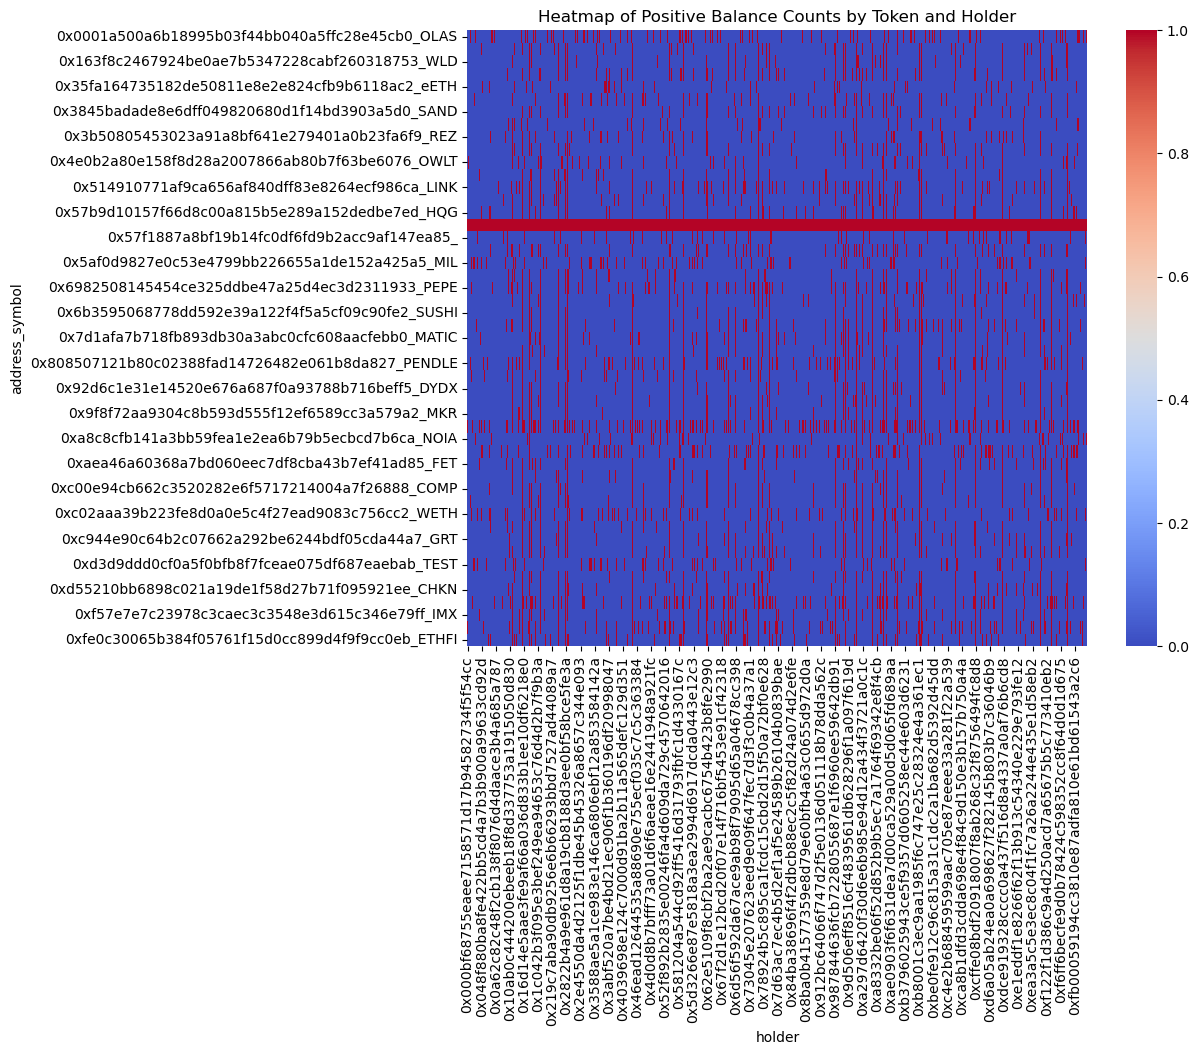

In [186]:
# Plotting the heatmap
plt.figure(figsize=(10, 8))  # Adjust the size of the figure as needed
sns.heatmap(filtered_pivot_table, annot=False, cmap='coolwarm', robust=True)  # 'd' for decimal format
plt.title('Heatmap of Positive Balance Counts by Token and Holder')
plt.show()

# 4. Holder token balances 

In [193]:
# Create a pivot table
balance_pivot_table = df_positive.pivot_table(index='address_symbol', columns='holder', values='balance_clean', aggfunc='sum', fill_value=0)


/Users/patdoyle/anaconda3/lib/python3.11/site-packages/pandas/core/dtypes/cast.py:383: RuntimeWarning:

invalid value encountered in cast



In [194]:
filtered_tokens_symbol = filtered_pivot_table.index

In [196]:
balance_pivot_table = balance_pivot_table[balance_pivot_table.index.isin(filtered_tokens_symbol)]

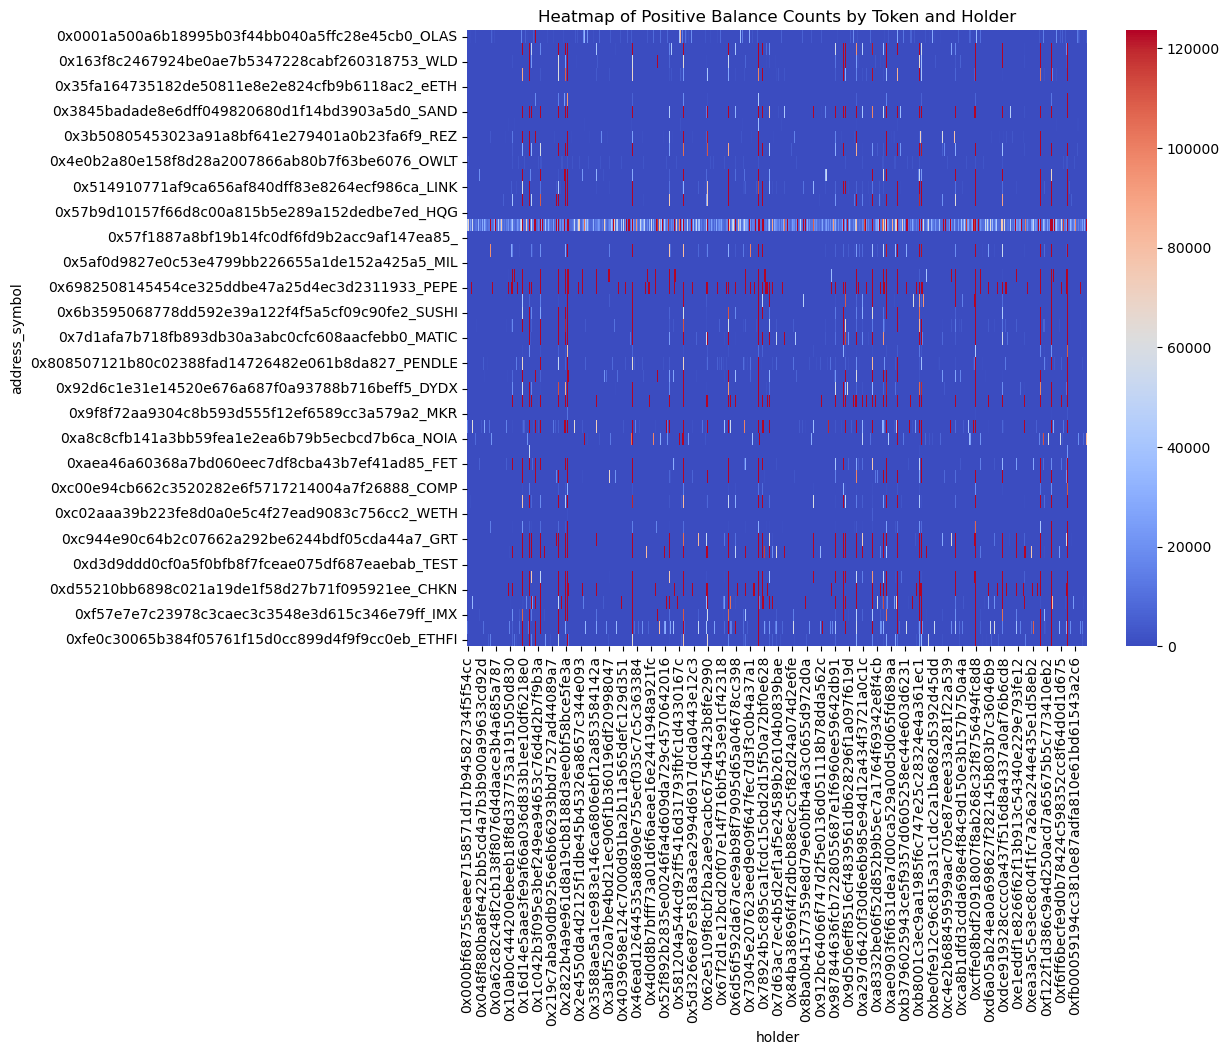

In [198]:
# Plotting the heatmap
plt.figure(figsize=(10, 8))  
sns.heatmap(balance_pivot_table, annot=False, cmap='coolwarm', robust=True)
plt.title('Heatmap of Balances by Token and Holder')
plt.show()